### Problem Statement:

Build a Classification Model to predict whether a customer is eligible for loan or not on the basis of the 12 input features.

### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_set=pd.read_csv('train_loan1.csv')
train_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test_set=pd.read_csv('test_loan1.csv')
test_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### Checking for null values:

In [4]:
train_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test_set.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Data Cleaning:

In [18]:
train_set['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
train_set['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
train_set['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [21]:
train_set['Dependents']=train_set['Dependents'].str.replace('+','')

In [22]:
train_set['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [23]:
test_set['Dependents'].value_counts()

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [24]:
test_set['Dependents']=test_set['Dependents'].str.replace('+','')

In [25]:
train_set['Education'].value_counts()

2    480
1    134
Name: Education, dtype: int64

In [26]:
def a(x):
    if x=='Graduate':
        x=2
    else:
        x=1
    return x

In [27]:
train_set['Education']=train_set['Education'].apply(a)

In [28]:
train_set['Education'].value_counts()

1    614
Name: Education, dtype: int64

In [29]:
test_set['Education']=test_set['Education'].apply(a)

In [30]:
test_set['Education'].value_counts()

1    367
Name: Education, dtype: int64

In [31]:
train_set['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [32]:
train_set['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [33]:
train_set['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [34]:
train_set['CoapplicantIncome'].min()

0.0

In [35]:
train_set['CoapplicantIncome'].max()

41667.0

In [36]:
train_set['ApplicantIncome'].min()

150

In [37]:
train_set['ApplicantIncome'].max()

81000

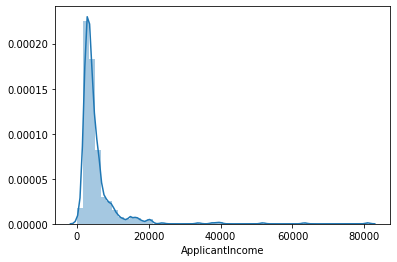

In [38]:
sns.distplot(train_set['ApplicantIncome'])

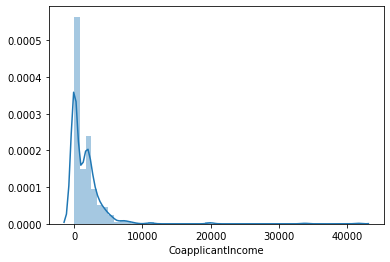

In [39]:
sns.distplot(train_set['CoapplicantIncome'])

In [40]:
train_set['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [41]:
train_set['LoanAmount'].min()

9.0

In [42]:
train_set['LoanAmount'].max()

700.0

In [43]:
train_set['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [44]:
def a(x):
    if x==1.0:
        x='Yes'
    else:
        x='No'
    return x

In [45]:
train_set['Credit_History']=train_set['Credit_History'].apply(a)

In [46]:
train_set['Credit_History'].value_counts()

Yes    475
No     139
Name: Credit_History, dtype: int64

In [47]:
test_set['Credit_History']=test_set['Credit_History'].apply(a)

In [48]:
test_set['Credit_History'].value_counts()

Yes    279
No      88
Name: Credit_History, dtype: int64

In [49]:
train_set['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [50]:
train_set['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [51]:
def a(x):
    if x=='Y':
        x=1
    else:
        x=0
    return x

In [52]:
train_set['Loan_Status']=train_set['Loan_Status'].apply(a)

In [53]:
train_set['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [54]:
train_set['Dependents']=pd.to_numeric(train_set['Dependents'],errors='coerce')

In [55]:
test_set['Dependents']=pd.to_numeric(test_set['Dependents'],errors='coerce')

In [56]:
train_set['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Checking the skewness of the data:

In [59]:
train_set.skew()

Dependents           0.978647
Education            0.000000
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Loan_Status         -0.809998
dtype: float64

In [60]:
import scipy.stats as st

In [61]:
l=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']
l

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [62]:
for i in l:
    train_set[i]=st.boxcox(train_set[i]+1)[0]
train_set.skew()

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1038: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


Dependents            0.978647
Education             0.000000
ApplicantIncome      -0.092946
CoapplicantIncome    -0.145646
LoanAmount           16.151381
Loan_Amount_Term      5.746570
Loan_Status          -0.809998
dtype: float64

In [63]:
for i in l:
        test_set[i]=st.boxcox(test_set[i]+1)[0]
test_set.skew()

Dependents            0.896526
Education             0.000000
ApplicantIncome       0.656709
CoapplicantIncome    -0.201452
LoanAmount           17.620698
Loan_Amount_Term      6.120983
dtype: float64

In [64]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null int64
Self_Employed        582 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [65]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null float64
Education            367 non-null int64
Self_Employed        344 non-null object
ApplicantIncome      367 non-null float64
CoapplicantIncome    367 non-null float64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       367 non-null object
Property_Area        367 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 34.5+ KB


In [66]:
train_set.isnull().sum()[train_set.isnull().sum()!=0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [67]:
test_set.isnull().sum()[test_set.isnull().sum()!=0]

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
dtype: int64

In [68]:
pd.DataFrame(test_set.groupby(['Dependents','Credit_History','Gender','Married'])['Education'].value_counts())

Education
Dependents Credit_History Gender Married Education           
0.0        No             Female No      1                  9
                                 Yes     1                  3
                          Male   No      1                 18
                                 Yes     1                 16
           Yes            Female No      1                 21
                                 Yes     1                 10
                          Male   No      1                 51
                                 Yes     1                 65
1.0        No             Female No      1                  1
                                 Yes     1                  1
                          Male   No      1                  1
                                 Yes     1                  6
           Yes            Female No      1                  6
                                 Yes     1                  5
                          Male   No      1                  4
                                 Yes     1                 32
2.0        No             Female No      1                  1
                                 Yes     1                  1
                          Male   No      1                  2
                                 Yes     1                 11
           Yes            Female No      1                  1
                                 Yes     1                  3
                          Male   No      1                  2
                                 Yes     1                 38
3.0        No             Female No      1                  2
                                 Yes     1                  1
                          Male   No      1                  2
                                 Yes     1                  9
           Yes            Female No      1                  1
                                 Yes     1                  2
                          Male   Yes     1                 22

In [69]:
a=test_set.loc[test_set['Gender'].isnull()]
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0.0,1,No,27.271634,0.000000,1.227836e+16,5.489786e+20,Yes,Urban
51,LP001287,NaN,Yes,3.0,1,No,26.426662,9.007241,5.219725e+16,5.489786e+20,Yes,Semiurban
106,LP001563,NaN,No,0.0,1,No,21.045493,10.354611,4.865338e+16,5.489786e+20,No,Urban
138,LP001769,NaN,No,NaN,1,No,26.060191,9.727809,2.513397e+16,5.489786e+20,Yes,Semiurban
209,LP002165,NaN,No,1.0,1,No,22.609896,11.946938,1.129510e+16,5.489786e+20,Yes,Rural
231,LP002298,NaN,No,0.0,1,Yes,24.941244,11.360151,1.690128e+17,5.489786e+20,Yes,Urban
245,LP002355,NaN,Yes,0.0,1,No,25.725997,11.459813,3.408754e+17,1.582583e+18,No,Semiurban
279,LP002553,NaN,No,0.0,1,No,47.458336,0.000000,1.993558e+18,5.489786e+20,Yes,Semiurban
296,LP002614,NaN,No,0.0,1,No,31.442292,0.000000,2.154572e+16,5.489786e+20,Yes,Semiurban
303,LP002657,NaN,Yes,1.0,1,Yes,15.406020,10.707565,4.476992e+14,5.489786e+20,Yes,Rural


In [70]:
pd.DataFrame(a.groupby(['Dependents','Credit_History','Married'])['Education'].value_counts())

Education
Dependents Credit_History Married Education           
0.0        No             No      1                  1
                          Yes     1                  1
           Yes            No      1                  5
1.0        Yes            No      1                  1
                          Yes     1                  1
3.0        Yes            Yes     1                  1

In [71]:
test_set.loc[(test_set['Married']=='No')
             &(test_set['Dependents']==0)
             &(test_set['Credit_History']=='Yes')
             &(test_set['Education']==2)
             &(test_set['Gender'].isnull()), 'Gender']='Male'

In [72]:
test_set['Gender']=test_set['Gender'].fillna('Male')

In [73]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Dependents']==3)
             &(train_set['Credit_History']=='Yes')
             &(train_set['Loan_Status']==1)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [74]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Dependents']==2)
             &(train_set['Credit_History']=='No')
             &(train_set['Loan_Status']==0)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [75]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Property_Area']==1)
             &(train_set['Credit_History']=='Yes')
             &(train_set['Education']==2)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [76]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Property_Area']==2)
             &(train_set['Credit_History']=='No')
             &(train_set['Education']==2)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [77]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Property_Area']==2)
             &(train_set['Credit_History']=='Yes')
             &(train_set['Education']==2)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [78]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Property_Area']==3)
             &(train_set['Credit_History']=='Yes')
             &(train_set['Education']==2)
             &(train_set['Gender'].isnull()), 'Gender']='Male'

In [79]:
train_set['Gender']=train_set['Gender'].fillna('Male')

In [80]:
train_set.isnull().sum()[train_set.isnull().sum()!=0]

Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [81]:
b=train_set.loc[train_set['Married'].isnull()]
b

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,1,No,5.587596,8.105249,5.868615e+17,5.489786e+20,Yes,Urban,1
228,LP001760,Male,NaN,NaN,1,No,5.682078,0.000000,5.278889e+17,6.244597e+21,Yes,Semiurban,1
435,LP002393,Female,NaN,NaN,1,No,5.986929,0.000000,NaN,1.789695e+19,Yes,Semiurban,1


In [82]:
pd.DataFrame(b.groupby(['Property_Area','Credit_History','Gender'])['Education'].value_counts())

Education
Property_Area Credit_History Gender Education           
Semiurban     Yes            Female 1                  1
                             Male   1                  1
Urban         Yes            Male   1                  1

In [83]:
pd.DataFrame(train_set.groupby(['Property_Area','Credit_History','Gender','Married'])['Education'].value_counts())

Education
Property_Area Credit_History Gender Married Education           
Rural         No             Female No      1                  2
                                    Yes     1                  2
                             Male   No      1                  9
                                    Yes     1                 29
              Yes            Female No      1                 17
                                    Yes     1                  3
                             Male   No      1                 35
                                    Yes     1                 82
Semiurban     No             Female No      1                  8
                                    Yes     1                  4
                             Male   No      1                  8
                                    Yes     1                 26
              Yes            Female No      1                 26
                                    Yes     1                 16
                             Male   No      1                 38
                                    Yes     1                105
Urban         No             Female No      1                 10
                                    Yes     1                  2
                             Male   No      1                  9
                                    Yes     1                 30
              Yes            Female No      1                 17
                                    Yes     1                  4
                             Male   No      1                 34
                                    Yes     1                 95

In [84]:
train_set['Married']=train_set['Married'].fillna('Yes')

In [85]:
test_set.isnull().sum()[train_set.isnull().sum()!=0]

Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
dtype: int64

In [86]:
c=test_set.loc[test_set['Dependents'].isnull()]
c

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,LP001237,Male,Yes,NaN,1,No,27.763399,10.028767,6.515698e+17,5.489786e+20,Yes,Urban
70,LP001366,Female,No,NaN,1,No,25.872892,0.000000,7.346461e+15,5.489786e+20,Yes,Semiurban
111,LP001587,Male,Yes,NaN,1,No,27.609088,0.000000,6.146307e+15,5.489786e+20,Yes,Semiurban
138,LP001769,Male,No,NaN,1,No,26.060191,9.727809,2.513397e+16,5.489786e+20,Yes,Semiurban
202,LP002111,Male,Yes,NaN,1,No,25.324727,9.798748,1.129510e+16,5.489786e+20,No,Urban
247,LP002360,Male,Yes,NaN,1,No,35.468710,0.000000,NaN,5.489786e+20,Yes,Urban
251,LP002385,Male,Yes,NaN,1,No,27.180019,0.000000,5.703208e+14,1.176953e+20,Yes,Semiurban
265,LP002441,Male,No,NaN,1,No,26.595453,11.558569,1.690128e+17,5.489786e+20,No,Semiurban
302,LP002654,Female,No,NaN,1,Yes,39.631308,0.000000,1.373634e+18,5.489786e+20,Yes,Rural
312,LP002754,Male,No,NaN,1,No,22.700042,10.692408,1.569630e+16,2.620030e+15,Yes,Urban


In [87]:
pd.DataFrame(c.groupby(['Property_Area','Gender'])['Credit_History'].value_counts())

Credit_History
Property_Area Gender Credit_History                
Rural         Female Yes                          1
Semiurban     Female Yes                          1
              Male   Yes                          3
                     No                           1
Urban         Male   Yes                          3
                     No                           1

In [88]:
pd.DataFrame(test_set.groupby(['Property_Area','Gender','Credit_History'])['Dependents'].value_counts())

Dependents
Property_Area Gender Credit_History Dependents            
Rural         Female No             0.0                  3
                                    1.0                  1
                                    3.0                  1
                     Yes            0.0                  7
                                    1.0                  5
              Male   No             0.0                 14
                                    2.0                  6
                                    1.0                  2
                                    3.0                  1
                     Yes            0.0                 39
                                    2.0                 16
                                    1.0                 10
                                    3.0                  5
Semiurban     Female No             0.0                  3
                                    2.0                  2
                                    3.0                  2
                     Yes            0.0                 12
                                    1.0                  3
                                    2.0                  3
                                    3.0                  1
              Male   No             0.0                 14
                                    3.0                  4
                                    1.0                  3
                                    2.0                  3
                     Yes            0.0                 33
                                    1.0                 14
                                    2.0                  7
                                    3.0                  7
Urban         Female No             0.0                  6
                                    1.0                  1
                     Yes            0.0                 12
                                    1.0                  3
                                    3.0                  2
                                    2.0                  1
              Male   No             0.0                  8
                                    3.0                  6
                                    2.0                  4
                                    1.0                  2
                     Yes            0.0                 49
                                    2.0                 17
                                    1.0                 14
                                    3.0                 11

In [89]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==1)
             &(train_set['Gender']=='Male')
             &(train_set['Dependents'].isnull()), 'Dependents']=0

In [90]:
train_set.loc[(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==0)
             &(train_set['Gender']=='Male')
             &(train_set['Dependents'].isnull()), 'Dependents']=0

In [91]:
train_set['Dependents']=train_set['Dependents'].fillna(0)

In [92]:
test_set['Dependents']=test_set['Dependents'].fillna(0)

In [93]:
test_set['Married']=test_set['Married'].fillna(0)

In [94]:
d=test_set.loc[test_set['Self_Employed'].isnull()]
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,1,NaN,38.619404,0.000000,6.573242e+19,1.789695e+19,Yes,Urban
11,LP001082,Male,Yes,1.0,1,NaN,23.073217,10.079024,6.515698e+17,5.489786e+20,Yes,Semiurban
13,LP001094,Male,Yes,2.0,1,NaN,37.439675,0.000000,8.001343e+17,5.489786e+20,No,Semiurban
36,LP001208,Male,Yes,2.0,1,NaN,32.569145,11.947926,1.993558e+18,1.582583e+18,Yes,Urban
72,LP001375,Male,Yes,1.0,1,NaN,27.611007,10.370386,1.795954e+17,1.576028e+14,Yes,Urban
89,LP001472,Female,No,0.0,1,NaN,29.334049,0.000000,3.845890e+18,5.489786e+20,Yes,Rural
142,LP001789,Male,Yes,3.0,1,NaN,31.863135,8.226580,1.795954e+17,5.489786e+20,No,Urban
161,LP001906,Male,No,0.0,1,NaN,25.198592,0.000000,2.620030e+15,5.489786e+20,No,Semiurban
168,LP001950,Female,Yes,3.0,1,NaN,21.623849,11.325422,6.722798e+15,5.489786e+20,No,Semiurban
175,LP001999,Male,Yes,2.0,1,NaN,29.092940,12.219379,5.868615e+17,5.489786e+20,Yes,Rural


In [95]:
pd.DataFrame(d.groupby(['Property_Area','Gender'])['Credit_History'].value_counts())

Credit_History
Property_Area Gender Credit_History                
Rural         Female No                           1
                     Yes                          1
              Male   No                           3
                     Yes                          3
Semiurban     Female No                           1
              Male   No                           3
                     Yes                          3
Urban         Male   Yes                          6
                     No                           2

In [96]:
pd.DataFrame(test_set.groupby(['Property_Area','Gender','Credit_History'])['Self_Employed'].value_counts())

Self_Employed
Property_Area Gender Credit_History Self_Employed               
Rural         Female No             No                         4
                     Yes            No                        10
                                    Yes                        2
              Male   No             No                        18
                                    Yes                        2
                     Yes            No                        53
                                    Yes                       14
Semiurban     Female No             No                         5
                                    Yes                        1
                     Yes            No                        19
                                    Yes                        1
              Male   No             No                        21
                                    Yes                        1
                     Yes            No                        56
                                    Yes                        5
Urban         Female No             No                         7
                     Yes            No                        18
              Male   No             No                        19
                     Yes            No                        77
                                    Yes                       11

In [97]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']==1)
             &(train_set['Gender']=='Male')
             &(train_set['Self_Employed'].isnull()), 'Self_Employed']='No'

In [98]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']==3)
             &(train_set['Gender']=='Male')
             &(train_set['Self_Employed'].isnull()), 'Self_Employed']='No'

In [99]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']==2)
             &(train_set['Gender']=='Female')
             &(train_set['Self_Employed'].isnull()), 'Self_Employed']='No'

In [100]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']==2)
             &(train_set['Gender']=='Male')
             &(train_set['Self_Employed'].isnull()), 'Self_Employed']='No'

In [101]:
train_set['Self_Employed']=train_set['Self_Employed'].fillna('No')

In [102]:
test_set['Self_Employed']=test_set['Self_Employed'].fillna('No')

In [103]:
f=test_set.loc[test_set['LoanAmount'].isnull()]
f

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1.0,1,No,26.237428,11.959754,NaN,5.489786e+20,Yes,Semiurban
101,LP001542,Female,Yes,0.0,1,No,23.306610,0.000000,NaN,6.244597e+21,No,Semiurban
188,LP002057,Male,Yes,0.0,1,No,38.186687,0.000000,NaN,5.489786e+20,Yes,Rural
247,LP002360,Male,Yes,0.0,1,No,35.468710,0.000000,NaN,5.489786e+20,Yes,Urban
289,LP002593,Male,Yes,1.0,1,No,33.724651,11.933548,NaN,5.489786e+20,Yes,Urban


In [104]:
pd.DataFrame(f.groupby(['Education','Dependents'])['Property_Area'].value_counts())

Property_Area
Education Dependents Property_Area               
1         0.0        Rural                      1
                     Semiurban                  1
                     Urban                      1
          1.0        Semiurban                  1
                     Urban                      1

In [105]:
pd.DataFrame(test_set.groupby(['Education','Dependents','Property_Area'])['LoanAmount'].mean())

LoanAmount
Education Dependents Property_Area              
1         0.0        Rural          1.440151e+18
                     Semiurban      2.994710e+20
                     Urban          5.140371e+18
          1.0        Rural          1.304002e+18
                     Semiurban      9.173328e+19
                     Urban          7.411944e+18
          2.0        Rural          1.748634e+19
                     Semiurban      1.636226e+18
                     Urban          2.025424e+20
          3.0        Rural          1.543633e+20
                     Semiurban      5.982226e+17
                     Urban          3.732449e+19

In [106]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Urban')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==1)
             &(train_set['Education']==2)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=149.81250

In [107]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Rural')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==1)
             &(train_set['Education']==1)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=115.77778

In [108]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Urban')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==0)
             &(train_set['Education']==1)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=118.250

In [109]:
train_set.loc[(train_set['Credit_History']=='No')
             &(train_set['Property_Area']=='Rural')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==0)
             &(train_set['Education']==2)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=148.722

In [110]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Semiurban')
             &(train_set['Gender']=='Female')
             &(train_set['Loan_Status']==1)
             &(train_set['Education']==2)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=149.57

In [111]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Semiurban')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==1)
             &(train_set['Education']==2)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=146.06

In [112]:
train_set.loc[(train_set['Credit_History']=='Yes')
             &(train_set['Property_Area']=='Urban')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==1)
             &(train_set['Education']==2)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=149.81250

In [113]:
train_set.loc[(train_set['Credit_History']=='No')
             &(train_set['Property_Area']=='Urban')
             &(train_set['Gender']=='Male')
             &(train_set['Loan_Status']==0)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=142.521739

In [114]:
train_set.loc[(train_set['Property_Area']=='Urban')
             &(train_set['Loan_Status']==0)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=139.49

In [115]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Loan_Status']==0)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=158.4477

In [116]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Loan_Status']==1)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=147.6656

In [117]:
train_set.loc[(train_set['Property_Area']=='Semiurban')
             &(train_set['Loan_Status']==0)
             &(train_set['LoanAmount'].isnull()), 'LoanAmount']=154.566

In [118]:
test_set.loc[(test_set['Property_Area']=='Rural')
             &(test_set['Dependents']==0)
             &(test_set['Education']==1)
             &(test_set['LoanAmount'].isnull()), 'LoanAmount']=127.0000

In [119]:
test_set.loc[(test_set['Property_Area']=='Semiurban')
             &(test_set['Dependents']==0)
             &(test_set['Education']==2)
             &(test_set['LoanAmount'].isnull()), 'LoanAmount']=132.54

In [120]:
test_set.loc[(test_set['Property_Area']=='Semiurban')
             &(test_set['Dependents']==1)
             &(test_set['Education']==2)
             &(test_set['LoanAmount'].isnull()), 'LoanAmount']=157.56

In [121]:
test_set.loc[(test_set['Property_Area']=='Urban')
             &(test_set['Dependents']==1)
             &(test_set['Education']==2)
             &(test_set['LoanAmount'].isnull()), 'LoanAmount']=134.5000

In [122]:
train_set['LoanAmount']=train_set['LoanAmount'].fillna(train_set['LoanAmount'].mean())

In [123]:
test_set['LoanAmount']=test_set['LoanAmount'].fillna(test_set['LoanAmount'].mean())

In [124]:
test_set.isnull().sum()[test_set.isnull().sum()!=0]

Loan_Amount_Term    6
dtype: int64

In [125]:
train_set.isnull().sum()[train_set.isnull().sum()!=0]

Loan_Amount_Term    14
dtype: int64

In [126]:
g=test_set.loc[test_set['Loan_Amount_Term'].isnull()]
g

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0.0,1,No,27.945248,11.883226,1.993558e+18,NaN,No,Urban
48,LP001268,Male,No,0.0,1,No,31.860518,11.576257,2.182636e+18,NaN,Yes,Urban
117,LP001611,Male,Yes,1.0,1,No,20.728317,11.302170,1.741612e+15,NaN,No,Rural
129,LP001695,Male,Yes,1.0,1,No,26.033330,10.674433,5.703208e+14,NaN,Yes,Semiurban
184,LP002045,Male,Yes,3.0,1,No,35.630076,8.824859,3.408754e+17,NaN,Yes,Urban
214,LP002183,Male,Yes,0.0,1,No,26.959610,11.789055,4.532344e+16,NaN,Yes,Rural


In [127]:
pd.DataFrame(g.groupby(['Married'])['Property_Area'].value_counts())

Property_Area
Married Property_Area               
No      Urban                      1
Yes     Rural                      2
        Urban                      2
        Semiurban                  1

In [128]:
pd.DataFrame(train_set.groupby(['Married','Property_Area'])['Loan_Amount_Term'].mean())

Loan_Amount_Term
Married Property_Area                  
No      Rural              7.286500e+20
        Semiurban          6.531585e+20
        Urban              9.007139e+20
Yes     Rural              4.751790e+20
        Semiurban          6.800875e+20
        Urban              4.936387e+20

In [129]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Married']=='No')
             &(train_set['Loan_Status']==0)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=362.5

In [130]:
train_set.loc[(train_set['Property_Area']=='Urban')
             &(train_set['Married']=='No')
             &(train_set['Loan_Status']==0)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=351.724

In [131]:
train_set.loc[(train_set['Property_Area']=='Urban')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==0)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=334.05

In [132]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==0)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=335.44

In [133]:
train_set.loc[(train_set['Property_Area']=='Semiurban')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==0)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=349.65

In [134]:
train_set.loc[(train_set['Property_Area']=='Urban')
             &(train_set['Married']=='No')
             &(train_set['Loan_Status']==1)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=337.89

In [135]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Married']=='No')
             &(train_set['Loan_Status']==1)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=363.24

In [136]:
train_set.loc[(train_set['Property_Area']=='Semiurban')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==1)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=345.81

In [137]:
train_set.loc[(train_set['Property_Area']=='Urban')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==1)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=324.131

In [138]:
train_set.loc[(train_set['Property_Area']=='Rural')
             &(train_set['Married']=='Yes')
             &(train_set['Loan_Status']==1)
             &(train_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=336.67

In [139]:
train_set['Loan_Amount_Term']=train_set['Loan_Amount_Term'].fillna(train_set['Loan_Amount_Term'].mean())

In [140]:
train_set.isnull().sum()[train_set.isnull().sum()!=0]

Series([], dtype: int64)

In [141]:
test_set.loc[(test_set['Property_Area']=='Urban')
             &(test_set['Married']=='No')
             &(test_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=343.82

In [142]:
test_set.loc[(test_set['Property_Area']=='Rural')
             &(test_set['Married']=='No')
             &(test_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=362.94

In [143]:
test_set.loc[(test_set['Property_Area']=='Urban')
             &(test_set['Married']=='Yes')
             &(test_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=327.06

In [144]:
test_set.loc[(test_set['Property_Area']=='Semiurban')
             &(test_set['Married']=='Yes')
             &(test_set['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term']=346.57

In [145]:
test_set['Loan_Amount_Term']=test_set['Loan_Amount_Term'].fillna(test_set['Loan_Amount_Term'].mean())

In [146]:
test_set.isnull().sum()[test_set.isnull().sum()!=0]

Series([], dtype: int64)

In [147]:
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,1,No,5.768597,0.000000,6.698156e+20,5.489786e+20,Yes,Urban,1
1,LP001003,Male,Yes,1.0,1,No,5.666179,9.149314,8.978623e+16,5.489786e+20,Yes,Rural,0
2,LP001005,Male,Yes,0.0,1,Yes,5.482132,0.000000,3.489481e+14,5.489786e+20,Yes,Urban,1
3,LP001006,Male,Yes,0.0,1,No,5.415221,9.845889,5.219725e+16,5.489786e+20,Yes,Urban,1
4,LP001008,Male,No,0.0,1,No,5.779154,0.000000,2.025285e+17,5.489786e+20,Yes,Urban,1


### Encoding catgorical columns to numerical columns:

In [148]:
train_set=pd.get_dummies(train_set,columns=['Gender','Married','Self_Employed','Credit_History','Property_Area'])
train_set.shape

(614, 19)

In [149]:
test_set=pd.get_dummies(test_set,columns=['Gender','Married','Self_Employed','Credit_History','Property_Area'])
test_set.shape

(367, 18)

In [150]:
train=train_set.drop('Loan_ID',axis=1)

In [151]:
test=test_set.drop('Loan_ID',axis=1)

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
Dependents                 614 non-null float64
Education                  614 non-null int64
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Loan_Status                614 non-null int64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Credit_History_No          614 non-null uint8
Credit_History_Yes         614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(5), int64(2), uint8(11)
memory usage: 40.

### X,y split:

In [154]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
Dependents                 614 non-null float64
Education                  614 non-null int64
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Credit_History_No          614 non-null uint8
Credit_History_Yes         614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(5), int64(1), uint8(11)
memory usage: 35.5 KB


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classe

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [158]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNN())])
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                     ('lgbc',lgb.LGBMClassifier())])
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     ('sgradient',SGDClassifier())])
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     ('extratree',ExtraTreesClassifier())])
pipeline_svc=Pipeline([('scalar11',StandardScaler()),
                     ('svc',SVC())])
pipeline_gbc=Pipeline([('scalar12',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])

In [159]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgbc,pipeline_lgbc,pipeline_ada,pipeline_sgdc,pipeline_nb,pipeline_extratree,pipeline_svc,pipeline_gbc]

In [160]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [161]:
pipe_dict={0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'ExtraTree',10:'SVC',11:'GBC'}

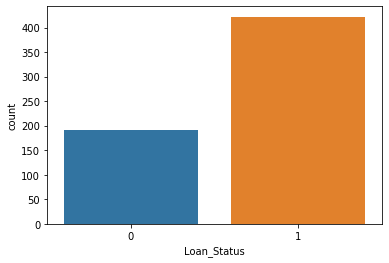

In [162]:
sns.countplot(train_set['Loan_Status'])

### Balancing the unbalanced target variable:

In [163]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('auto')

In [164]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(664, 17) (664,)


In [165]:
for i in pipelines:
    i.fit(X_sm,y_sm)
    predictions=i.predict(X_test)
    print('Classification Report : \n',(classification_report(y_test,predictions)))

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        33
           1       0.85      0.84      0.85        90

    accuracy                           0.78       123
   macro avg       0.72      0.73      0.72       123
weighted avg       0.78      0.78      0.78       123

Classification Report : 
               precision    recall  f1-score   support

           0       0.37      0.48      0.42        33
           1       0.79      0.70      0.74        90

    accuracy                           0.64       123
   macro avg       0.58      0.59      0.58       123
weighted avg       0.68      0.64      0.66       123

Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.81      0.83      0.82        90

    accuracy                           0.73       123
   macro avg       0.65      0.64      0.65       

In [166]:
for i,model in enumerate(pipelines): print('{} Train Accuracy {}'.format(pipe_dict[i],model.score(X_sm,y_sm)))

Logistic Regression Train Accuracy 0.7469879518072289
Random Forest Train Accuracy 1.0
Decision Tree Train Accuracy 1.0
KNN Train Accuracy 0.8403614457831325
XGBC Train Accuracy 1.0
LGBC Train Accuracy 1.0
ADA Train Accuracy 0.8343373493975904
SGDC Train Accuracy 0.6671686746987951
NB Train Accuracy 0.7319277108433735
ExtraTree Train Accuracy 1.0
SVC Train Accuracy 0.8072289156626506
GBC Train Accuracy 0.8960843373493976


In [167]:
for i,model in enumerate(pipelines): print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy 0.7804878048780488
Random Forest Test Accuracy 0.6422764227642277
Decision Tree Test Accuracy 0.7317073170731707
KNN Test Accuracy 0.7317073170731707
XGBC Test Accuracy 0.7154471544715447
LGBC Test Accuracy 0.7154471544715447
ADA Test Accuracy 0.7642276422764228
SGDC Test Accuracy 0.6747967479674797
NB Test Accuracy 0.6991869918699187
ExtraTree Test Accuracy 0.7398373983739838
SVC Test Accuracy 0.7967479674796748
GBC Test Accuracy 0.7560975609756098


In [168]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
r_param = [{"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)},
              
               {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
            {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
           
{"classifier": [DecisionTreeClassifier()],
 "classifier__criterion":['gini','entropy'], 
 "classifier__max_depth":[5,8,15,25,30,None],
 "classifier__min_samples_leaf":[1,2,5,10,15,100],
 "classifier__max_leaf_nodes": [2, 5,10]},
           
{'classifier':[lgb.LGBMClassifier()], 
 'classifier__n_estimators':np.arange(50,250,5),
 'classifier__max_depth':np.arange(2,15,5), 
 'classifier__num_leaves':np.arange(2,60,5)},
           
           {'classifier':[XGBClassifier()],
            "classifier__learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "classifier__max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15], 
            "classifier__min_child_weight" : [ 1, 3, 5, 7 ], 
            "classifier__gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], 
            "classifier__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]},
           
           {'classifier':[SGDClassifier()], ##Stocasticated Gradient decent
       # "classifier__C": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
        "classifier__penalty": ['l2']},
           
            {"classifier":[GradientBoostingClassifier()],
        "classifier__learning_rate":np.arange(0.05,0.5,0.01),
        "classifier__n_estimators":np.arange(50,250,5),
        'classifier__max_depth':np.arange(4,15,5),
        #'classifier__num_leaves':np.arange(4,60,5),
        "classifier__min_samples_leaf":[1,2,5,10,15,100],
        "classifier__max_leaf_nodes": [2, 5,10]}

      ]
           
           

In [169]:
import sklearn.metrics
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'micro')

In [170]:
rsearch = RandomizedSearchCV(pipe, r_param, cv=5, verbose=0,n_jobs=-1,random_state=0,scoring=scorer)

In [171]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                       

In [172]:
print(rsearch.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.22000000000000003,
                                            loss='deviance', max_depth=4,
                                            max_features=None, max_leaf_nodes=2,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=110,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                   

In [173]:
GBC=GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.22000000000000003,
                                            loss='deviance', max_depth=4,
                                            max_features=None, max_leaf_nodes=2,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=110,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                            random_state=None, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)

In [174]:
GBC=RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'n_estimators': [5, 10,20,50,100],
                               'max_depth':[5, 10, 15,50,None],
                               'min_samples_leaf':[1,2,5,10, 50, 100],
                               'min_samples_split': [2,4,6,10,20,100,200]}])

In [175]:
GBC_model=GBC.fit(X_train,y_train)

In [176]:
Score=GBC_model.score(X_train,y_train)
Score

0.7759674134419552

In [177]:
GBC_predictions=GBC_model.predict(test)
GBC_predictions.shape

(367,)

In [178]:
sub = pd.DataFrame(GBC_predictions)

In [179]:
def a(x):
    if x==1:
        x='Y'
    else:
        x='N'
    return x

In [180]:
sub=sub.rename(columns={0:'Loan_Status'})
sub

,Loan_Status
0,1
1,1
2,1
3,0
4,1
...,...
362,1
363,1
364,0
365,1


In [181]:
sub['Loan_Status']=sub['Loan_Status'].apply(a)

In [182]:
att=pd.DataFrame(test_set['Loan_ID'])
att

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [183]:
final=pd.concat([att,sub],axis=1)
final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [184]:
final.to_csv('Submission_loan_status5.csv',index=False)